In [163]:
import requests#爬虫库
import re

In [164]:
def Pachong(ur):#定义一个爬虫函数，返回爬下来的内容。函数参数为网址
    import requests#爬虫库
    import random
    USER_AGENT_LIST = [
    'MSIE (MSIE 6.0; X11; Linux; i686) Opera 7.23',
    'Opera/9.20 (Macintosh; Intel Mac OS X; U; en)',
    'Opera/9.0 (Macintosh; PPC Mac OS X; U; en)',
    'iTunes/9.0.3 (Macintosh; U; Intel Mac OS X 10_6_2; en-ca)',
    'Mozilla/4.76 [en_jp] (X11; U; SunOS 5.8 sun4u)',
    'iTunes/4.2 (Macintosh; U; PPC Mac OS X 10.2)',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; rv:5.0) Gecko/20100101 Firefox/5.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; rv:9.0) Gecko/20100101 Firefox/9.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.8; rv:16.0) Gecko/20120813 Firefox/16.0',
    'Mozilla/4.77 [en] (X11; I; IRIX;64 6.5 IP30)',
    'Mozilla/4.8 [en] (X11; U; SunOS; 5.7 sun4u)'
     ]
     # 随机生成user agent
    s = requests.Session()#解决重定向，直接用 requests.get(url)重定向次数多，Response不能返回正常值200
     #s.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36'
    s.headers['User-Agent'] =random.choice(USER_AGENT_LIST)
    response= s.get(ur)
    response.encoding = 'UTF-8'
    return response.text

In [165]:
def f_Stationline_name(html_content):#定义一个函数，输入为爬下来的内容，输出为某一条地铁线路的名称
    import re  
    line_pattern = re.compile(r'<title>北京地铁\w*\d*\w*线|<title>北京现代有轨电车西郊线')
    #r'\d+|你好'
    line_name=line_pattern.findall(html_content)
    line_name=re.findall(r'北京地铁\w*\d*\w*线|北京现代有轨电车西郊线',line_name[0])
    return line_name

In [166]:
def f_splitlist(list): #定义一个函数去除列表的嵌套关系。输入为需要去除关系的列表，输出为得到的新列表
    alist = []
    a = 0
    for sublist in list:
        try: #用try来判断是列表中的元素是不是可迭代的，可以迭代的继续迭代
            for i in sublist:
                alist.append (i)
        except TypeError: #不能迭代的就是直接取出放入alist
            alist.append(sublist)
    for i in alist:
        if type(i) == type([]):#判断是否还有列表
            a =+ 1
            break
    if a==1:
        return printlist(alist) #还有列表，进行递归
    if a==0:
        return alist 
 

In [167]:
def f_onlylist(list1):#定义一个函数去除列表中的重复元素，输入为原列表，输出为不重
    list2=[]
    for i in list1:
        if not i in list2:
            list2.append(i)
    return list2

In [168]:
def f_Station_name(html_content):#定义一个函数，输入为爬下来的内容，输出为某一条地铁线路的区间名
    import re  
    #qujian_pattern = re.compile('<*t*h*>\w+——\w+</th>')
    #qujian_pattern = re.compile('<*t*h*b*>\w+——\w+</t*h*b*>')
    qujian_pattern = re.compile('<*t*h*b*>\w+——\w+</t*h*b*>')
    #>四惠——四惠东</th>
    #机场 <b>东直门——三元桥</b>
    
    #>9号线 郭公庄</th>
    #亦庄线 >1 宋家庄</div>
    #16号线 >西苑～农大南路</td>
    #燕房线 <th width="184">燕山</th>
    #有轨电车 valign="top">颐和园西门站</td>
    qujian_name=qujian_pattern.findall(html_content)
    for i in range(len(qujian_name)):#去掉没用的字符
        qujian_name[i] = re.findall('[\u4E00-\u9FA5]+',qujian_name[i])#只匹配汉字
    return  qujian_name

In [169]:
def f_Station_distance(html_content):#定义一个函数，输入爬下来的内容。输出为某一条地铁线路的站与站之间长度。
    import re
    qujianLength_pattern = re.compile('>\d+米<')
    qujianLength=qujianLength_pattern.findall(html_content)
    for i in range(len(qujianLength)):#去掉没用的字符
        qujianLength[i] = re.findall('\d+',str(qujianLength[i]))
    return qujianLength

In [170]:
def f_Station_distance_dic(html_content):#定义一个函数（未写完），输入爬下来的内容。输出为某一条地铁线路的站与站名称为键名，长度为键值。
    qujian_name=Station_nname(html_content)
    qujianLength=Station_distance(html_content)
    return Station_distance_dic

In [171]:
#以下为抓取所有地铁线路的百度百科网址
html_contentz=Pachong('https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485')#获取百度百科北京地铁内容
http_pattern = re.compile('item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%\d+%\S+%E7%BA%BF')
http_name=http_pattern.findall(html_contentz)
http_name=f_onlylist(http_name)
new_list = ['https://baike.baidu.com/'+x for x in http_name]
http_name=new_list
len(http_name)
#https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF
http_name

['https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%A4%A7%E5%85%

In [172]:
len(http_name)

21

In [173]:
station=[]
for i in range(0,len(http_name)): 
    html_content=Pachong(http_name[i])
    station.append(f_Stationline_name(html_content))
station  

[['北京地铁1号线'],
 ['北京地铁13号线'],
 ['北京地铁八通线'],
 ['北京地铁5号线'],
 ['北京地铁8号线'],
 ['北京地铁10号线'],
 ['北京地铁机场线'],
 ['北京地铁4号线'],
 ['北京地铁15号线'],
 ['北京地铁昌平线'],
 ['北京地铁大兴线'],
 ['北京地铁房山线'],
 ['北京地铁亦庄线'],
 ['北京地铁9号线'],
 ['北京地铁6号线'],
 ['北京地铁14号线'],
 ['北京地铁7号线'],
 ['北京地铁16号线'],
 ['北京现代有轨电车西郊线'],
 ['北京地铁燕房线'],
 ['北京地铁2号线']]

In [174]:
len(station)  

21

In [175]:
for i in range(0,len(http_name)): #站名放进列表
    html_content=Pachong(http_name[i])
    station_name=f_Station_name(html_content)
    station_name=f_splitlist(station_name)
    station_name=f_onlylist(station_name)
    (station[i]).append(station_name)
 #>9号线 郭公庄</th>   13
    #亦庄线 >1 宋家庄</div>  12
    #16号线 >西苑～农大南路</td>  17(有公里）
    #燕房线 <th width="184">燕山</th> 19
    #有轨电车 valign="top"> 颐和园西门站</td> 18这些站有问题，需要单独扒下来

In [176]:
station

[['北京地铁1号线',
  ['苹果园',
   '古城',
   '八角游乐园',
   '八宝山',
   '玉泉路',
   '五棵松',
   '万寿路',
   '公主坟',
   '军事博物馆',
   '木樨地',
   '南礼士路',
   '复兴门',
   '西单',
   '天安门西',
   '天安门东',
   '王府井',
   '东单',
   '建国门',
   '永安里',
   '国贸',
   '大望路',
   '四惠',
   '四惠东']],
 ['北京地铁13号线',
  ['西直门',
   '大钟寺',
   '知春路',
   '五道口',
   '上地',
   '西二旗',
   '龙泽',
   '回龙观',
   '霍营',
   '立水桥',
   '北苑',
   '望京西',
   '芍药居',
   '光熙门',
   '柳芳',
   '东直门']],
 ['北京地铁八通线',
  ['四惠',
   '四惠东',
   '高碑店',
   '传媒大学',
   '双桥',
   '管庄',
   '八里桥',
   '通州北苑',
   '果园',
   '九棵树',
   '梨园',
   '临河里',
   '土桥']],
 ['北京地铁5号线',
  ['天通苑北',
   '天通苑',
   '天通苑南',
   '立水桥',
   '立水桥南',
   '北苑路北',
   '大屯路东',
   '惠新西街北口',
   '惠新西街南口',
   '和平西桥',
   '和平里北街',
   '雍和宫',
   '北新桥',
   '张自忠路',
   '东四',
   '灯市口',
   '东单',
   '崇文门',
   '磁器口',
   '天坛东门',
   '蒲黄榆',
   '刘家窑',
   '宋家庄']],
 ['北京地铁8号线',
  ['朱辛庄',
   '育知路',
   '平西府',
   '回龙观东大街',
   '霍营',
   '育新',
   '西小口',
   '永泰庄',
   '林萃桥',
   '森林公园南门',
   '奥林匹克公园',
   '奥体中心',
   '北土城',
   '安华桥',
   '安德里北街',
   '鼓楼大街'

In [177]:
#定义一个函数，输入为匹配的字符和爬下某来特定地铁站的内容，输出为此地铁线站名
def f_Pachong_stationname(pattern,html_content):
    import re  
    station_name=re.findall(pattern,html_content)
    for i in range(len(station_name)):#去掉没用的字符
        station_name[i] = re.findall('[\u4E00-\u9FA5]+',station_name[i])#只匹配汉字
    return  station_name

In [178]:
html_content=Pachong(http_name[12])
station_name=f_Pachong_stationname('div class="para" label-module="para">\d\d?\s?[\u4E00-\u9FA5][\u4E00-\u9FA5]+\S*</div>',html_content)
station_name=f_splitlist(station_name)
del station[12][1]#删除原来的空列表
(station[12]).append(station_name)
#'<div class="para" label-module="para">d+ 肖村</div>')
    #<div class="para" label-module="para">1 宋家庄</div>
    #<div class="para" label-module="para">2 肖村</div>
    #<div class="para" label-module="para">11经海路</div>
    #<div class="para" label-module="para">8 荣京东街东口（原荣京东街站）</div>

In [179]:
station

[['北京地铁1号线',
  ['苹果园',
   '古城',
   '八角游乐园',
   '八宝山',
   '玉泉路',
   '五棵松',
   '万寿路',
   '公主坟',
   '军事博物馆',
   '木樨地',
   '南礼士路',
   '复兴门',
   '西单',
   '天安门西',
   '天安门东',
   '王府井',
   '东单',
   '建国门',
   '永安里',
   '国贸',
   '大望路',
   '四惠',
   '四惠东']],
 ['北京地铁13号线',
  ['西直门',
   '大钟寺',
   '知春路',
   '五道口',
   '上地',
   '西二旗',
   '龙泽',
   '回龙观',
   '霍营',
   '立水桥',
   '北苑',
   '望京西',
   '芍药居',
   '光熙门',
   '柳芳',
   '东直门']],
 ['北京地铁八通线',
  ['四惠',
   '四惠东',
   '高碑店',
   '传媒大学',
   '双桥',
   '管庄',
   '八里桥',
   '通州北苑',
   '果园',
   '九棵树',
   '梨园',
   '临河里',
   '土桥']],
 ['北京地铁5号线',
  ['天通苑北',
   '天通苑',
   '天通苑南',
   '立水桥',
   '立水桥南',
   '北苑路北',
   '大屯路东',
   '惠新西街北口',
   '惠新西街南口',
   '和平西桥',
   '和平里北街',
   '雍和宫',
   '北新桥',
   '张自忠路',
   '东四',
   '灯市口',
   '东单',
   '崇文门',
   '磁器口',
   '天坛东门',
   '蒲黄榆',
   '刘家窑',
   '宋家庄']],
 ['北京地铁8号线',
  ['朱辛庄',
   '育知路',
   '平西府',
   '回龙观东大街',
   '霍营',
   '育新',
   '西小口',
   '永泰庄',
   '林萃桥',
   '森林公园南门',
   '奥林匹克公园',
   '奥体中心',
   '北土城',
   '安华桥',
   '安德里北街',
   '鼓楼大街'

In [180]:
html_content=Pachong(http_name[13])
station_name=f_Pachong_stationname('th align="center" valign="middle">\w+</th>',html_content)
#<th align="center" valign="middle">郭公庄</th>
#<th align="center" valign="middle">国家图书馆</th>
station_name=f_splitlist(station_name)
del station_name[0]
del station_name[0]
del station[13][1]#删除原来的空列表
(station[13]).append(station_name)


In [181]:
html_content=Pachong(http_name[17])
station_name=f_Pachong_stationname('\w+～\w+</td>|>\w+~\w+</td',html_content)
#<td width="331" align="center" valign="middle" class="coloredcell">西苑～农大南路</td>
#<td width="331" align="center" valign="middle" colspan="1" rowspan="1" class="coloredcell">农大南路~马连洼</td>
station_name=f_splitlist(station_name)
station_name=f_onlylist(station_name)
del station[17][1]#删除原来的空列表
(station[17]).append(station_name)



In [182]:
html_content=Pachong(http_name[18])
station_name=f_Pachong_stationname('<td width="\d+" valign="\w+">\w+站</td>',html_content)
station_name=f_splitlist(station_name)
for i in range(0,len(station_name)):
    station_name[i]=station_name[i][:-1]
del station[18][1]#删除原来的空列表
(station[18]).append(station_name)
#<td width="14" valign="top">巴沟站</td>
#<td width="14" valign="top">香山站</td>
station_name

['巴沟', '颐和园西门', '茶棚', '万安', '植物园', '香山']

In [183]:
html_content=Pachong(http_name[19])
station_name=f_Pachong_stationname('<th width="184">\w+</th>',html_content)
station_name=f_splitlist(station_name)
del station_name[0]
station_name.append('紫草坞')
station_name.append('阎村东')
del station[19][1]#删除原来的空列表
(station[19]).append(station_name)


In [184]:
station

[['北京地铁1号线',
  ['苹果园',
   '古城',
   '八角游乐园',
   '八宝山',
   '玉泉路',
   '五棵松',
   '万寿路',
   '公主坟',
   '军事博物馆',
   '木樨地',
   '南礼士路',
   '复兴门',
   '西单',
   '天安门西',
   '天安门东',
   '王府井',
   '东单',
   '建国门',
   '永安里',
   '国贸',
   '大望路',
   '四惠',
   '四惠东']],
 ['北京地铁13号线',
  ['西直门',
   '大钟寺',
   '知春路',
   '五道口',
   '上地',
   '西二旗',
   '龙泽',
   '回龙观',
   '霍营',
   '立水桥',
   '北苑',
   '望京西',
   '芍药居',
   '光熙门',
   '柳芳',
   '东直门']],
 ['北京地铁八通线',
  ['四惠',
   '四惠东',
   '高碑店',
   '传媒大学',
   '双桥',
   '管庄',
   '八里桥',
   '通州北苑',
   '果园',
   '九棵树',
   '梨园',
   '临河里',
   '土桥']],
 ['北京地铁5号线',
  ['天通苑北',
   '天通苑',
   '天通苑南',
   '立水桥',
   '立水桥南',
   '北苑路北',
   '大屯路东',
   '惠新西街北口',
   '惠新西街南口',
   '和平西桥',
   '和平里北街',
   '雍和宫',
   '北新桥',
   '张自忠路',
   '东四',
   '灯市口',
   '东单',
   '崇文门',
   '磁器口',
   '天坛东门',
   '蒲黄榆',
   '刘家窑',
   '宋家庄']],
 ['北京地铁8号线',
  ['朱辛庄',
   '育知路',
   '平西府',
   '回龙观东大街',
   '霍营',
   '育新',
   '西小口',
   '永泰庄',
   '林萃桥',
   '森林公园南门',
   '奥林匹克公园',
   '奥体中心',
   '北土城',
   '安华桥',
   '安德里北街',
   '鼓楼大街'

In [185]:
station[0][1][0]
import copy
station1=copy.deepcopy(station)#列表中还有列表，需要这样处理

In [186]:
for i in range(0,len(station1)):#每站都加上（线路名）,放在station1里
    Xianlu_name=station1[i][0].strip('北京地铁')
    Xianlu_name=Xianlu_name.strip('北京现代有轨电车')
    for j in range(0,len(station1[i][1])):
        station1[i][1][j]= station1[i][1][j]+' '+'('+Xianlu_name+')'
station1

[['北京地铁1号线',
  ['苹果园 (1号线)',
   '古城 (1号线)',
   '八角游乐园 (1号线)',
   '八宝山 (1号线)',
   '玉泉路 (1号线)',
   '五棵松 (1号线)',
   '万寿路 (1号线)',
   '公主坟 (1号线)',
   '军事博物馆 (1号线)',
   '木樨地 (1号线)',
   '南礼士路 (1号线)',
   '复兴门 (1号线)',
   '西单 (1号线)',
   '天安门西 (1号线)',
   '天安门东 (1号线)',
   '王府井 (1号线)',
   '东单 (1号线)',
   '建国门 (1号线)',
   '永安里 (1号线)',
   '国贸 (1号线)',
   '大望路 (1号线)',
   '四惠 (1号线)',
   '四惠东 (1号线)']],
 ['北京地铁13号线',
  ['西直门 (13号线)',
   '大钟寺 (13号线)',
   '知春路 (13号线)',
   '五道口 (13号线)',
   '上地 (13号线)',
   '西二旗 (13号线)',
   '龙泽 (13号线)',
   '回龙观 (13号线)',
   '霍营 (13号线)',
   '立水桥 (13号线)',
   '北苑 (13号线)',
   '望京西 (13号线)',
   '芍药居 (13号线)',
   '光熙门 (13号线)',
   '柳芳 (13号线)',
   '东直门 (13号线)']],
 ['北京地铁八通线',
  ['四惠 (八通线)',
   '四惠东 (八通线)',
   '高碑店 (八通线)',
   '传媒大学 (八通线)',
   '双桥 (八通线)',
   '管庄 (八通线)',
   '八里桥 (八通线)',
   '通州北苑 (八通线)',
   '果园 (八通线)',
   '九棵树 (八通线)',
   '梨园 (八通线)',
   '临河里 (八通线)',
   '土桥 (八通线)']],
 ['北京地铁5号线',
  ['天通苑北 (5号线)',
   '天通苑 (5号线)',
   '天通苑南 (5号线)',
   '立水桥 (5号线)',
   '立水桥南 (5号线)',
   '北苑路北 (5号线)',


In [187]:
station

[['北京地铁1号线',
  ['苹果园',
   '古城',
   '八角游乐园',
   '八宝山',
   '玉泉路',
   '五棵松',
   '万寿路',
   '公主坟',
   '军事博物馆',
   '木樨地',
   '南礼士路',
   '复兴门',
   '西单',
   '天安门西',
   '天安门东',
   '王府井',
   '东单',
   '建国门',
   '永安里',
   '国贸',
   '大望路',
   '四惠',
   '四惠东']],
 ['北京地铁13号线',
  ['西直门',
   '大钟寺',
   '知春路',
   '五道口',
   '上地',
   '西二旗',
   '龙泽',
   '回龙观',
   '霍营',
   '立水桥',
   '北苑',
   '望京西',
   '芍药居',
   '光熙门',
   '柳芳',
   '东直门']],
 ['北京地铁八通线',
  ['四惠',
   '四惠东',
   '高碑店',
   '传媒大学',
   '双桥',
   '管庄',
   '八里桥',
   '通州北苑',
   '果园',
   '九棵树',
   '梨园',
   '临河里',
   '土桥']],
 ['北京地铁5号线',
  ['天通苑北',
   '天通苑',
   '天通苑南',
   '立水桥',
   '立水桥南',
   '北苑路北',
   '大屯路东',
   '惠新西街北口',
   '惠新西街南口',
   '和平西桥',
   '和平里北街',
   '雍和宫',
   '北新桥',
   '张自忠路',
   '东四',
   '灯市口',
   '东单',
   '崇文门',
   '磁器口',
   '天坛东门',
   '蒲黄榆',
   '刘家窑',
   '宋家庄']],
 ['北京地铁8号线',
  ['朱辛庄',
   '育知路',
   '平西府',
   '回龙观东大街',
   '霍营',
   '育新',
   '西小口',
   '永泰庄',
   '林萃桥',
   '森林公园南门',
   '奥林匹克公园',
   '奥体中心',
   '北土城',
   '安华桥',
   '安德里北街',
   '鼓楼大街'

In [188]:
len(station)

21

In [189]:
station[1][1][1]

'大钟寺'

In [190]:

a=['1号站','2号站','3号站','4号站','5号站','6号站','7号站']
dict={}
for i in range(0,len(a)-1):
    key = a[i]
    value=a[i+1]
    klist=[]
    klist.append(value)
    if key not in dict.keys():
        dict[key] = klist        #此句话玄机
for i in range(1,len(a)):
    j=len(a)-i
    key = a[j]
    value=a[j-1]
    if key not in dict.keys():
        klist=[]
        klist.append(value) 
        dict[key] = klist         #此句话玄机 
    else:
        dict[key].append(value)
print (dict)



{'1号站': ['2号站'], '2号站': ['3号站', '1号站'], '3号站': ['4号站', '2号站'], '4号站': ['5号站', '3号站'], '5号站': ['6号站', '4号站'], '6号站': ['7号站', '5号站'], '7号站': ['6号站']}


In [191]:
#把条线的线路关系放到字典里，输入为某一条线路上的站点组成的列表，输出为字典
def f_station_dict(a):
    dict={}
    for i in range(0,len(a)-1):
        key = a[i]
        value=a[i+1]
        klist=[]
        klist.append(value)
        if key not in dict.keys():
            dict[key] = klist        #此句话玄机
    for i in range(1,len(a)):
        j=len(a)-i
        key = a[j]
        value=a[j-1]
        if key not in dict.keys():
            klist=[]
            klist.append(value) 
            dict[key] = klist         #此句话玄机 
        else:
            dict[key].append(value)
    return dict


In [192]:
#每条线建立一个字典
connection0=f_station_dict(station[0][1])
connection1=f_station_dict(station[1][1])
connection2=f_station_dict(station[2][1])
connection3=f_station_dict(station[3][1])
connection4=f_station_dict(station[4][1])
connection5=f_station_dict(station[5][1])
connection6=f_station_dict(station[6][1])
connection7=f_station_dict(station[7][1])
connection8=f_station_dict(station[8][1])
connection9=f_station_dict(station[9][1])
connection10=f_station_dict(station[10][1])
connection11=f_station_dict(station[11][1])
connection12=f_station_dict(station[12][1])
connection13=f_station_dict(station[13][1])
connection14=f_station_dict(station[14][1])
connection15=f_station_dict(station[15][1])
connection16=f_station_dict(station[16][1])
connection17=f_station_dict(station[17][1])
connection18=f_station_dict(station[18][1])
connection19=f_station_dict(station[19][1])
connection20=f_station_dict(station[20][1])
connection20['西直门'].append('积水潭')#2号线是环线
connection20['积水潭'].append('西直门')
connection5['巴沟'].append('火器营')#2号线是环线
connection5['火器营'].append('巴沟')

In [193]:
from functools import reduce
def f_hebingdict(dict1,dict2):
    for i,j in dict2.items():
        if i in dict1.keys():
            dict1[i] += j
        else:
            dict1.update({f'{i}' : dict2[i]})
    return dict1
connection=reduce(f_hebingdict,[connection0,connection1,connection2,connection3,connection4,connection5,connection6,connection7,connection8,connection9,connection10,connection11,connection12,connection13,connection14,connection15,connection16,connection17,connection18,connection19,connection20])

In [194]:
#不知道为什么connection里有很多重复的内容，写本段程序去掉
for i,j in connection.items():
    connection[i]=f_onlylist(j)

In [195]:
connection

{'苹果园': ['古城'],
 '古城': ['八角游乐园', '苹果园'],
 '八角游乐园': ['八宝山', '古城'],
 '八宝山': ['玉泉路', '八角游乐园'],
 '玉泉路': ['五棵松', '八宝山'],
 '五棵松': ['万寿路', '玉泉路'],
 '万寿路': ['公主坟', '五棵松'],
 '公主坟': ['军事博物馆', '万寿路', '西钓鱼台', '莲花桥'],
 '军事博物馆': ['木樨地', '公主坟', '白堆子', '北京西站'],
 '木樨地': ['南礼士路', '军事博物馆'],
 '南礼士路': ['复兴门', '木樨地'],
 '复兴门': ['西单', '南礼士路', '长椿街', '阜成门'],
 '西单': ['天安门西', '复兴门', '宣武门', '灵境胡同'],
 '天安门西': ['天安门东', '西单'],
 '天安门东': ['王府井', '天安门西'],
 '王府井': ['东单', '天安门东'],
 '东单': ['建国门', '王府井', '崇文门', '灯市口'],
 '建国门': ['永安里', '东单', '朝阳门', '北京站'],
 '永安里': ['国贸', '建国门'],
 '国贸': ['大望路', '永安里', '双井', '金台夕照'],
 '大望路': ['四惠', '国贸', '红庙', '九龙山'],
 '四惠': ['四惠东', '大望路'],
 '四惠东': ['四惠', '高碑店'],
 '西直门': ['大钟寺', '新街口', '动物园', '车公庄', '积水潭'],
 '大钟寺': ['知春路', '西直门'],
 '知春路': ['五道口', '大钟寺', '西土城', '知春里'],
 '五道口': ['上地', '知春路'],
 '上地': ['西二旗', '五道口'],
 '西二旗': ['龙泽', '上地', '生命科学园'],
 '龙泽': ['回龙观', '西二旗'],
 '回龙观': ['霍营', '龙泽'],
 '霍营': ['立水桥', '回龙观', '育新', '回龙观东大街'],
 '立水桥': ['北苑', '霍营', '立水桥南', '天通苑南'],
 '北苑': ['望京西', '立水桥'],
 '望京西'

In [196]:
connection_huancheng={}#站对应线路的字典
for i in connection.keys():
    if i not in connection_huancheng.keys():
        connection_huancheng.update({f'{i}' : connection[i]})

connection_huancheng={}#换乘车站字典
for i in connection.keys():
    if len(connection[i])>2:
        if i not in connection_huancheng.keys():
            connection_huancheng.update({f'{i}' : connection[i]})

In [197]:
for i in connection_huancheng.keys():
    connection_huancheng[i]=[]
connection_huancheng

{'苹果园': [],
 '古城': [],
 '八角游乐园': [],
 '八宝山': [],
 '玉泉路': [],
 '五棵松': [],
 '万寿路': [],
 '公主坟': [],
 '军事博物馆': [],
 '木樨地': [],
 '南礼士路': [],
 '复兴门': [],
 '西单': [],
 '天安门西': [],
 '天安门东': [],
 '王府井': [],
 '东单': [],
 '建国门': [],
 '永安里': [],
 '国贸': [],
 '大望路': [],
 '四惠': [],
 '四惠东': [],
 '西直门': [],
 '大钟寺': [],
 '知春路': [],
 '五道口': [],
 '上地': [],
 '西二旗': [],
 '龙泽': [],
 '回龙观': [],
 '霍营': [],
 '立水桥': [],
 '北苑': [],
 '望京西': [],
 '芍药居': [],
 '光熙门': [],
 '柳芳': [],
 '东直门': [],
 '高碑店': [],
 '传媒大学': [],
 '双桥': [],
 '管庄': [],
 '八里桥': [],
 '通州北苑': [],
 '果园': [],
 '九棵树': [],
 '梨园': [],
 '临河里': [],
 '土桥': [],
 '天通苑北': [],
 '天通苑': [],
 '天通苑南': [],
 '立水桥南': [],
 '北苑路北': [],
 '大屯路东': [],
 '惠新西街北口': [],
 '惠新西街南口': [],
 '和平西桥': [],
 '和平里北街': [],
 '雍和宫': [],
 '北新桥': [],
 '张自忠路': [],
 '东四': [],
 '灯市口': [],
 '崇文门': [],
 '磁器口': [],
 '天坛东门': [],
 '蒲黄榆': [],
 '刘家窑': [],
 '宋家庄': [],
 '朱辛庄': [],
 '育知路': [],
 '平西府': [],
 '回龙观东大街': [],
 '育新': [],
 '西小口': [],
 '永泰庄': [],
 '林萃桥': [],
 '森林公园南门': [],
 '奥林匹克公园': [],
 '奥体中心': []

In [198]:
a=['(1号线)', '(1号线)', '(八通线)', '(八通线)']
set(a)

{'(1号线)', '(八通线)'}

In [199]:
connection_huancheng
for m,n in connection_huancheng.items():
    for i in range(0,len(station1)):
        for j in range(0,len(station1[i][1])):
            if station1[i][1][j].startswith(m+' '):
                n.append(station1[i][1][j])
#print(connection_huancheng)
for n in connection_huancheng.values(): 
    for i in range(0,len(n)):
        a=n[i].split()[1] 
        n[i]=a
for i in connection_huancheng.keys():#去掉重复线路名
    list2=[]
    for j in connection_huancheng[i]:
        if j not in list2:
            list2.append(j);
    connection_huancheng[i]=list2
#dict.valuea
#dict.keys
#diict.items
#connection_huancheng#换乘线
#print(connection_huancheng)


In [200]:
connection_huancheng

{'苹果园': ['(1号线)'],
 '古城': ['(1号线)'],
 '八角游乐园': ['(1号线)'],
 '八宝山': ['(1号线)'],
 '玉泉路': ['(1号线)'],
 '五棵松': ['(1号线)'],
 '万寿路': ['(1号线)'],
 '公主坟': ['(1号线)', '(10号线)'],
 '军事博物馆': ['(1号线)', '(9号线)'],
 '木樨地': ['(1号线)'],
 '南礼士路': ['(1号线)'],
 '复兴门': ['(1号线)', '(2号线)'],
 '西单': ['(1号线)', '(4号线)'],
 '天安门西': ['(1号线)'],
 '天安门东': ['(1号线)'],
 '王府井': ['(1号线)'],
 '东单': ['(1号线)', '(5号线)'],
 '建国门': ['(1号线)', '(2号线)'],
 '永安里': ['(1号线)'],
 '国贸': ['(1号线)', '(10号线)'],
 '大望路': ['(1号线)', '(14号线)'],
 '四惠': ['(1号线)', '(八通线)'],
 '四惠东': ['(1号线)', '(八通线)'],
 '西直门': ['(13号线)', '(4号线)', '(2号线)'],
 '大钟寺': ['(13号线)'],
 '知春路': ['(13号线)', '(10号线)'],
 '五道口': ['(13号线)'],
 '上地': ['(13号线)'],
 '西二旗': ['(13号线)', '(昌平线)'],
 '龙泽': ['(13号线)'],
 '回龙观': ['(13号线)'],
 '霍营': ['(13号线)', '(8号线)'],
 '立水桥': ['(13号线)', '(5号线)'],
 '北苑': ['(13号线)'],
 '望京西': ['(13号线)', '(15号线)'],
 '芍药居': ['(13号线)', '(10号线)'],
 '光熙门': ['(13号线)'],
 '柳芳': ['(13号线)'],
 '东直门': ['(13号线)', '(机场线)', '(2号线)'],
 '高碑店': ['(八通线)'],
 '传媒大学': ['(八通线)'],
 '双桥': ['(八通线)'],
 '管

In [201]:
d={'a':['(1号线)', '(1号线)', '(八通线)', '(八通线)']}
set(d['a'])


{'(1号线)', '(八通线)'}

In [202]:
dict={'a':['a','b','a']}
set(dict['a'])

{'a', 'b'}

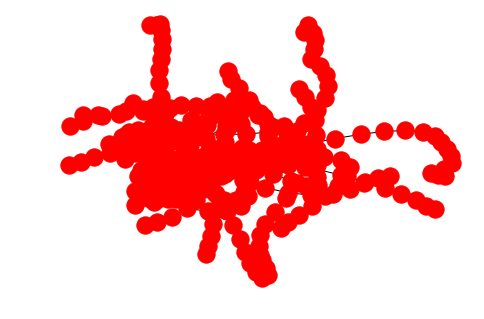

In [203]:
import networkx as nx
%matplotlib inline
graph= connection
g= nx.Graph(graph)
nx.draw(g)

In [204]:
a='12345 (000)'
m=a.split()[1]
m

'(000)'

In [205]:
#最短路线函数
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
        pathes = sorted(pathes, key=len) # 站数之和最小      
        seen.add(froniter)

In [206]:
nagivator('西直门','顺义', connection)

['西直门',
 '积水潭',
 '鼓楼大街',
 '安德里北街',
 '安华桥',
 '北土城',
 '安贞门',
 '惠新西街南口',
 '芍药居',
 '望京西',
 '望京',
 '望京东',
 '崔各庄',
 '马泉营',
 '孙河',
 '国展',
 '花梨坎',
 '后沙峪',
 '南法信',
 '石门',
 '顺义']

In [207]:
nagivator('顺义','望京', connection)

['顺义', '石门', '南法信', '后沙峪', '花梨坎', '国展', '孙河', '马泉营', '崔各庄', '望京东', '望京']

In [208]:
nagivator('天安门西','安定门', connection)

['天安门西', '西单', '复兴门', '阜成门', '车公庄', '西直门', '积水潭', '鼓楼大街', '安定门']

In [209]:
def lesschange(f):#定义最小换乘，f为一个车站列表，计算这个列表中的车站一共换乘了几次
    num=0
    if len(f)>2:
        for m in range(2,len(f)):
            a= f[m]
            b=f[m-2]
            c=len(connection_huancheng[a])
            d=len(connection_huancheng[b])
            a_zanshi=connection_huancheng[a]+connection_huancheng[b]
            b_zanshi=set(a_zanshi)
            e=len(b_zanshi)
            if e==c+d:
                num=num+1
    return num



In [210]:
f1=['天通苑北', '天通苑', '天通苑南', '立水桥','立水桥南','北苑路北','大屯路东','惠新西街北口','惠新西街南口','和平西桥','和平里北街','雍和宫']
f2=['天通苑北', '天通苑', '天通苑南', '立水桥', '北苑', '望京西', '芍药居', '光熙门', '柳芳', '东直门', '雍和宫']
f11=lesschange(f1)
f22=lesschange(f2)
print(f11)
print(f22)

0
2


In [211]:
c=len(connection_huancheng['天通苑南'])
print(connection_huancheng['天通苑南'])
d=len(connection_huancheng['北苑'])
print(connection_huancheng['北苑'])
a_zanshi=connection_huancheng['天通苑南']+connection_huancheng['北苑']
print(a_zanshi)
b_zanshi=set(a_zanshi)
print(b_zanshi)
e=len(b_zanshi)
print(e)

['(5号线)']
['(13号线)']
['(5号线)', '(13号线)']
{'(5号线)', '(13号线)'}
2


In [212]:
print(f11)
print(f22)

0
2


num=0
f=['(13号线)', '(8号线)', '(8号线)', '(8号线)', '(8号线)', '(15号线)', '(5号线)', '(1号线)']
if len(f)>=3:
    for m in range(0,len(f)):
        for i in range(0,len(station1)):
            for j in range(0,len(station1[i][1])):
                if station1[i][1][j].startswith(f[m]):
                    f[m]=station1[i][1][j]
                    f[m]=station1[i][1][j].split()[1]
    if f[0]!= f[1] and f[1]==f[2]:
        num=num+1 
    if f[len(f)]!=f[len(f)-1] and f[len(f)-1]==f[len(f)-2]:
        num=num+1 
    for i in range(1,len(f)-1): 
        if f[i]!=f[i-1] and f[i]==f[i+1]:
            num=num+1 

num

In [213]:
def nagivator_minchange(start, destination, connection_graph):#最小换乘函数
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
        pathes = sorted(pathes, key=lesschange) # 站数之和最小      
        seen.add(froniter)

In [214]:
def nagivator_minchange2(start, destination, connection_graph):#最小换乘函数，含线路
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                for i in range(0,len(path)):
                    path[i]=path[i]+str(connection_huancheng[path[i]])
                    #n=m+str(connection_huancheng[m])
                    #m=n
                return path
            else:
                pathes.append(path + [s])  
        pathes = sorted(pathes, key=lesschange) # 站数之和最小      
        seen.add(froniter)

In [215]:
nagivator_minchange2('西直门','安定门', connection)

["西直门['(13号线)', '(4号线)', '(2号线)']",
 "积水潭['(2号线)']",
 "鼓楼大街['(8号线)', '(2号线)']",
 "安定门['(2号线)']"]

In [216]:
nagivator_minchange('西直门','五道口', connection)

['西直门', '大钟寺', '知春路', '五道口']

In [217]:
nagivator_minchange('北京站','顺义', connection)

['北京站',
 '建国门',
 '朝阳门',
 '东四十条',
 '东直门',
 '柳芳',
 '光熙门',
 '芍药居',
 '望京西',
 '望京',
 '望京东',
 '崔各庄',
 '马泉营',
 '孙河',
 '国展',
 '花梨坎',
 '后沙峪',
 '南法信',
 '石门',
 '顺义']

In [218]:
nagivator_minchange('北京站','顺义', connection)

['北京站',
 '建国门',
 '朝阳门',
 '东四十条',
 '东直门',
 '柳芳',
 '光熙门',
 '芍药居',
 '望京西',
 '望京',
 '望京东',
 '崔各庄',
 '马泉营',
 '孙河',
 '国展',
 '花梨坎',
 '后沙峪',
 '南法信',
 '石门',
 '顺义']

In [219]:
def nagivator_minchange_jingguo(a,b,c,d,connection):# 经过特定线路，最小换乘   a起点,b为中点，c,d为经过的点
    connection_graph=connection
    start=a
    destination=c
    o=nagivator_minchange(start, destination, connection_graph)#最小换乘函数
    start=c
    destination=d
    p=nagivator_minchange(start, destination, connection_graph)#最小换乘函数
    start=d
    destination=b
    q=nagivator_minchange(start, destination, connection_graph)#最小换乘函数
    r=o+p+q
    for i in range(0,len(r)-2):#删除重复站点
        if r[i]==r[i+1]:
            r[i]='0'
    r.remove('0')
    r.remove('0')
    return r


In [241]:
def nagivator_minchange_jingguo2(a,b,c,connection):# 经过特定线路，最小换乘   a起点,b为中点，c为经过的点
    connection_graph=connection
    start=a
    destination=c
    o=nagivator_minchange(start, destination, connection_graph)#最小换乘函数
    start=c
    destination=b
    p=nagivator_minchange(start, destination, connection_graph)#最小换乘函数

    r=o+p
    for i in range(0,len(r)-2):#删除重复站点
        if r[i]==r[i+1]:#去除重复站
            r[i]='0'
    r.remove('0')
    return r

In [243]:
def nagivator_minchange_jingguo3(a,b,c,d,e,connection):# 经过特定线路，最小换乘   a起点,b为中点，c,d,e为经过的点
    connection_graph=connection
    start=a
    destination=e
    o=nagivator_minchange(start, destination, connection_graph)#最小换乘函数
    start=e
    destination=c
    p=nagivator_minchange(start, destination, connection_graph)#最小换乘函数
    start=c
    destination=d
    q=nagivator_minchange(start, destination, connection_graph)#最小换乘函数
    start=d
    destination=b
    q1=nagivator_minchange(start, destination, connection_graph)#最小换乘函数
    r=o+p+q+q1
    for i in range(0,len(r)-2):#删除重复站点
        if r[i]==r[i+1]:
            r[i]='0'
    r.remove('0')
    r.remove('0')
    r.remove('0')
    return r

In [244]:
nagivator_minchange_jingguo3('东单', '大屯路东','西直门', '安贞门','安定门',connection)

['东单',
 '灯市口',
 '东四',
 '张自忠路',
 '北新桥',
 '雍和宫',
 '安定门',
 '鼓楼大街',
 '积水潭',
 '西直门',
 '大钟寺',
 '知春路',
 '五道口',
 '上地',
 '西二旗',
 '龙泽',
 '回龙观',
 '霍营',
 '立水桥',
 '北苑',
 '望京西',
 '芍药居',
 '惠新西街南口',
 '安贞门',
 '惠新西街南口',
 '惠新西街北口',
 '大屯路东']

In [242]:
nagivator_minchange_jingguo2('东单', '大屯路东','西直门',connection)

['东单',
 '王府井',
 '天安门东',
 '天安门西',
 '西单',
 '复兴门',
 '阜成门',
 '车公庄',
 '西直门',
 '大钟寺',
 '知春路',
 '五道口',
 '上地',
 '西二旗',
 '龙泽',
 '回龙观',
 '霍营',
 '立水桥',
 '北苑',
 '望京西',
 '关庄',
 '大屯路东']

In [220]:
nagivator_minchange_jingguo('东单','郭公庄', '大屯路东','西直门',connection)

['东单',
 '灯市口',
 '东四',
 '张自忠路',
 '北新桥',
 '雍和宫',
 '和平里北街',
 '和平西桥',
 '惠新西街南口',
 '惠新西街北口',
 '大屯路东',
 '惠新西街北口',
 '惠新西街南口',
 '和平西桥',
 '和平里北街',
 '雍和宫',
 '安定门',
 '鼓楼大街',
 '积水潭',
 '西直门',
 '动物园',
 '国家图书馆',
 '白石桥南',
 '白堆子',
 '军事博物馆',
 '北京西站',
 '六里桥东',
 '六里桥',
 '七里庄',
 '丰台东大街',
 '丰台南路',
 '科怡路',
 '丰台科技园',
 '郭公庄']

In [221]:
def jumpout(a_zanhsi,b_zanhsi):#返回两个嵌套列表中的第一个相同元素
    for m in a_zanhsi:
        for n in b_zanhsi:
            if m==n:
                c_zanhsi=m
                return(c_zanhsi)

In [222]:
def nagivator_zonghe(start, destination, connection_graph):#最小换乘最小路程（站数），综合最优
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
        import  copy
        a_zanhsi= copy.deepcopy(pathes) 
        b_zanhsi= copy.deepcopy(pathes)  
        a_zanhsi= sorted(a_zanhsi, key=lesschange) # 换乘次数排序
        a_zanhsi= sorted(b_zanhsi, key=len) # 站数之和排序 
        c_zanhsi=jumpout(a_zanhsi,b_zanhsi)
        pathes.insert(0,c_zanhsi)
        seen.add(froniter)

In [223]:
nagivator('天通苑北','雍和宫',connection)#最短站数

['天通苑北', '天通苑', '天通苑南', '立水桥', '北苑', '望京西', '芍药居', '光熙门', '柳芳', '东直门', '雍和宫']

In [224]:
nagivator_minchange('天通苑北','雍和宫',connection)#最少换乘

['天通苑北',
 '天通苑',
 '天通苑南',
 '立水桥',
 '立水桥南',
 '北苑路北',
 '大屯路东',
 '惠新西街北口',
 '惠新西街南口',
 '和平西桥',
 '和平里北街',
 '雍和宫']

In [225]:
nagivator_zonghe('天通苑北','雍和宫',connection)#综合最优

['天通苑北', '天通苑', '天通苑南', '立水桥', '北苑', '望京西', '芍药居', '光熙门', '柳芳', '东直门', '雍和宫']

In [237]:
nagivator_minchange_jingguo('天通苑北','雍和宫', '北土城','大钟寺',connection)#制定经过

['天通苑北',
 '天通苑',
 '天通苑南',
 '立水桥',
 '立水桥南',
 '北苑路北',
 '大屯路东',
 '惠新西街北口',
 '惠新西街南口',
 '安贞门',
 '北土城',
 '健德门',
 '牡丹园',
 '西土城',
 '知春路',
 '大钟寺',
 '知春路',
 '五道口',
 '上地',
 '西二旗',
 '龙泽',
 '回龙观',
 '霍营',
 '立水桥',
 '北苑',
 '望京西',
 '芍药居',
 '光熙门',
 '柳芳',
 '东直门',
 '雍和宫']

以下为学习内容

Message = [[2,'Mike'],[1,'Jone'],[2,'Marry']]
dict1 = {}
for number in Message:
    value = number[0]
    if value not in dict1.keys():
        dict1[value] = [number]          #此句话玄机
    else:
        dict1[value].append(number)
print (dict1)


In [226]:
x = {'apple':1,'banana':5}
y = {'banana':10,'pear':11}
def func(dict1,dict2):
    for i,j in dict2.items():
        if i in dict1.keys():
            dict1[i] += j
        else:
            dict1.update({f'{i}' : dict2[i]})
    return dict1



In [227]:
x = {'apple':['1','2'],'banana':['1','2']}
y = {'banana':['3','4'],'pear':['5','6']}
def func(dict1,dict2):#返回第一个
    for i,j in dict2.items():
        if i in dict1.keys():
            dict1[i] += j
        else:
            dict1.update({f'{i}' : dict2[i]})
    return dict1
print(func(x,y))

{'apple': ['1', '2'], 'banana': ['1', '2', '3', '4'], 'pear': ['5', '6']}


In [228]:
from functools import reduce
x = {'apple':['1','2'],'banana':['1','2']}
y = {'banana':['3','4'],'pear':['5','6']}
z = {'pear':['7','8'],'tudou':['9','10'],'banana':['11','12'],'apple':['13','14']}
w= {'pear':['15','16'],'tudou':['17','18'],'banana':['19','20'],'apple':['21','22']}
def func(dict1,dict2):
    for i,j in dict2.items():
        if i in dict1.keys():
            dict1[i] += j
        else:
            dict1.update({f'{i}' : dict2[i]})
    return dict1
print(reduce(func,[x,y,z,w]))


{'apple': ['1', '2', '13', '14', '21', '22'], 'banana': ['1', '2', '3', '4', '11', '12', '19', '20'], 'pear': ['5', '6', '7', '8', '15', '16'], 'tudou': ['9', '10', '17', '18']}


In [229]:
from functools import reduce
x = {'apple':['1','2'],'banana':['1','2']}
y = {'banana':['3','4'],'pear':['5','6']}
z = {'pear':['7','8'],'tudou':['9','10'],'banana':['11','12'],'apple':['13','14']}
w= {'pear':['15','16'],'tudou':['17','18'],'banana':['19','20'],'apple':['21','22'],'watermelon':['21','22']}
def func(dict1,dict2):
    for i,j in dict2.items():
        if i in dict1.keys():
            dict1[i] += j
        else:
            dict1.update({f'{i}' : dict2[i]})
    return dict1
print(reduce(func,[x,y,z,w]))

{'apple': ['1', '2', '13', '14', '21', '22'], 'banana': ['1', '2', '3', '4', '11', '12', '19', '20'], 'pear': ['5', '6', '7', '8', '15', '16'], 'tudou': ['9', '10', '17', '18'], 'watermelon': ['21', '22']}


In [230]:
dict = { 1 : 2, 'a' : 'b', 'hello' : 'world' }  
dict.values()  


dict_values([2, 'b', 'world'])

In [231]:
s=dict.values() 
s

dict_values([2, 'b', 'world'])

In [232]:
 dict.keys()  


dict_keys([1, 'a', 'hello'])

In [233]:
dict.items()  


dict_items([(1, 2), ('a', 'b'), ('hello', 'world')])

In [234]:
a='西直门(2号线)'
b='西直门'
if a.startswith(b):
    b=a

In [235]:
b

'西直门(2号线)'

In [236]:
print(b.startswith('a'))

False
